# Introduction

This folder contains a few samples of solving equity trading problem using deep learning methods. 

Trading is a difficult game. There're so many participants with different roles in the game and the "rules" are much less well-defined than games like GO or Hold'em. So I'm not able to give winning strategies here. The samples only show how to "translate" trading to the problems that deep learning is good at. Maybe the "translation" is not good enough here, I hope you can find better ones to make some real money.

The samples are implemented in python using tensorflow/tensorlayer, while some data preparation codes are not presented here. However, I will show the input data format if necessary, so that you can prepare you own training/test data.

I tried a few different deep learning methods as below:

+ classfication
+ reinforcement learning

Before I go into more details, I'd like to emphasize that I'm not able to give winning strategies here. It will be obvious when you see the test result. It's not that easy to make money in financial market.

# Classfication
Classification is a very typical problem that machine learning can solve. In equity trading, generally speaking, if we can classify "good" and "bad" stocks, it's much easier to make profitable trading decisions. 

What's the definition of "good" stocks? From a trader's (to be more accurate, a trader with long positions) point of view, a "good" stock is the one whose price can go up by certain percentage in a period in the future. It really depends on the trader's goal. For example, we can define "good" stock as: price going up by 5% in the next 5 trading days. Is the criteria of 5% and 5 trading day reasonable? It just depends on the trader's goal.

What is the input? It can be any data related to the stock, for example, financial report of the underlying firm, trading price sequence, or even the weather if you believe stock price depends on it. Given the fact that a lot of traders like analyzing candle bar chart, I will take candle bar chart as input. To make it look more familiar to machine learning beginners, I will process the candle bar chart in a similar way as in MNIST problem.

## Input Data Process
MNIST problem is an image recognition problem. The images are input as a digit array, in which each digit represents a "pixel". I processed candle bar chart in a similar way.

Suppose we have a sequence of day prices (seq, open, high, low, close) of a stock for a particular time window of 20 trading days.

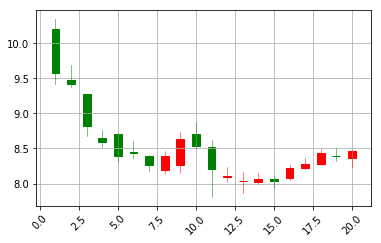

In [7]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf

prices = [[1,10.203817,10.342105,9.410782,9.577291],
[2,9.467226,9.693001,9.376915,9.419248],
[3,9.269672,9.269672,8.677012,8.820944],
[4,8.645968,8.758856,8.513325,8.592347],
[5,8.705234,8.719345,8.310127,8.386327],
[6,8.451237,8.606457,8.366571,8.431482],
[7,8.394793,8.406082,8.183129,8.256506],
[8,8.19724,8.465348,8.140796,8.386327],
[9,8.256506,8.733456,8.143618,8.640324],
[10,8.710879,8.871743,8.507681,8.533081],
[11,8.513325,8.617746,7.807778,8.211351],
[12,8.087174,8.228284,8.027908,8.10693],
[13,8.030731,8.157729,7.858577,8.036375],
[14,8.027908,8.152085,7.999687,8.067419],
[15,8.067419,8.104108,7.940421,8.033553],
[16,8.084352,8.26215,8.047664,8.225462],
[17,8.225462,8.358105,8.211351,8.276261],
[18,8.281906,8.485103,8.26215,8.439948],
[19,8.397615,8.499214,8.327061,8.394793],
[20,8.369393,8.470992,8.228284,8.462526]]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)    
ax.autoscale_view()    
plt.xticks(rotation=45)
plt.yticks()
mpf.candlestick_ohlc(ax,prices,width=0.5,colorup='r',colordown='green')
plt.grid()
plt.show()

We construct a grid of size of 50 by 20, and select the highest price and the lowest price during the 20 trading days as top and bottom. The x-axis is trading day sequence from 1 to 20, and the y-axis is price mapped to the grid. And we define five types of "pixel":

```
None = 0        # blank pixel
LongBody = 1     # a pixel of bar body with close >= open, red bar
LongTail = 2     # a pixel of bar tail with close >= open, red bar
ShortBody = -1    # a pixel of bar body with close < open, green bar
ShortTail = -2    # a pixel of bar tail with close < open, green bar
```

So the chart of 20 bars above can be converted to a matrix of 50 by 20 as below:

```
-2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
-2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-1 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-2 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-2 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
-2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 
 0  0 -1  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0 
 0  0 -2  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0 
 0  0 -2 -2  0  0  0  0  2 -2  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -2 -1  0  0  0  2 -1  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -1 -1  0  0  0  1 -1  0  0  0  0  0  0  0  0  0  0 
 0  0  0 -2 -1 -2  0  0  1 -1 -2  0  0  0  0  0  0  0  0  0
 0  0  0 -2 -1 -2  0  0  1 -2 -2  0  0  0  0  0  0  0  0  0 
 0  0  0  0 -1 -2  0  0  1  0 -1  0  0  0  0  0  0  2 -2  2 
 0  0  0  0 -1 -2  0  2  1  0 -1  0  0  0  0  0  0  1 -2  1 
 0  0  0  0 -2  0 -1  1  1  0 -1  0  0  0  0  0  0  1 -2  2 
 0  0  0  0 -2  0 -1  1  1  0 -1  0  0  0  0  0  2  1  0  2 
 0  0  0  0  0  0 -1  1  1  0 -1  0  0  0  0  0  1  2  0  2 
 0  0  0  0  0  0 -2  1  2  0 -1  2  0  0  0  1  2  0  0  0 
 0  0  0  0  0  0  0  2  2  0 -2  2  0  0  0  1  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  2  2  2  0  1  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  2  2  1 -1  2  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  0  2  2 -2  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  0  2  0 -2  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  0  2  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 
 0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0 
```

So now the trading problem is to classify a lot of the images to be "good" or "bad". Actually, in order to make it more similar to MNIST, I classify the whole training set to 10 types. At first, a few things to define: 

$V = (Close_{T+5} - Close_T) / (max - min)$


## Simple Neural Network

## CNN

# Reinforcement Learning